# Actividad Titanic EDA


#### Programación para análisis de datos
Roi Jared Flores Garza Stone

Rafael Takata García

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
path = "../data/raw/titanic/train.csv"

In [21]:
df = pd.read_csv(path, index_col='PassengerId')
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## Cantidad de muertos y sobrevivientes

In [22]:
survived = df.Survived.value_counts()
survived

Survived
0    549
1    342
Name: count, dtype: int64

 Los unos significan True y los ceros False.
 Significando que 549 personas murieron y 342 sobrevivieron

## Cantidad de personas que pagaron de mas

In [23]:
Q1 = df.Fare.quantile(0.25)
Q3 = df.Fare.quantile(0.75)
iqr = Q3 - Q1
fx_low = Q1 - 1.5*iqr
fx_upp = Q3 + 1.5*iqr

In [24]:
atp_fare = (df["Fare"] > (Q3 + 1.5*iqr))
val_atp = df.Fare.loc[atp_fare]
len(val_atp)

116

 116 fue el número de personas que pagaron de mas

## Media, mediana y moda del ticket

In [25]:
media = df.Fare.mean()
mediana = df.Fare.median()
moda = df.Fare.mode()

In [26]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [33]:
media

32.204207968574636

In [28]:
mediana

14.4542

In [29]:
moda


0    8.05
Name: Fare, dtype: float64

#### Los precios de los tickets tuvieron las siguientes medidas de centralidad
 $$
 media = 32.2042
 $$
 $$
 mediana = 14.4542
 $$
 $$
 moda = 8.05
 $$

## Varianza de las edades de los pasajeros

In [30]:
var_age = df.Age.var()
var_age

211.0191247463081

In [31]:
np.sqrt(var_age)

14.526497332334044

 La varianza de la edad de los pasajeros es de 211.0191 y su desviación estándar de 14.5264


## Probabilidad de supervivencia de una mujer de 40, comparada con la de un hombre de 70

In [32]:
mujer_parametro = ((df.Age  == 40.0) & (df.Sex == "female") & (df.Survived == 1))
cantidad_parametro_m = len(df.loc[mujer_parametro])
hombre_parametro = ((df.Age == 70.0) & (df.Sex == "male") & (df.Survived == 1))
cantidad_parametro_h = len(df.loc[hombre_parametro])
probabilidad_m = round((cantidad_parametro_m/len(df))*100, 2)
probabilidad_h = round((cantidad_parametro_h/len(df))*100, 2)

if probabilidad_h > probabilidad_m:
    print(f"Es mas probable que un hombre de 70 años sobreviva, con una probabilidad de {probabilidad_h}%")
else:
    print(f"Es mas probable que una mujer de 40 años sobreviva, con una probabilidad de {probabilidad_m}%")


Es mas probable que una mujer de 40 años sobreviva, con una probabilidad de 0.56%


## ¿Cómo se distribuyen las edades (sobrevivientes/no sobrevivientes) de los pasajeros del titanic?

In [46]:
surv_no = df[(df['Survived'] == 0)]
surv_no.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


<Axes: >

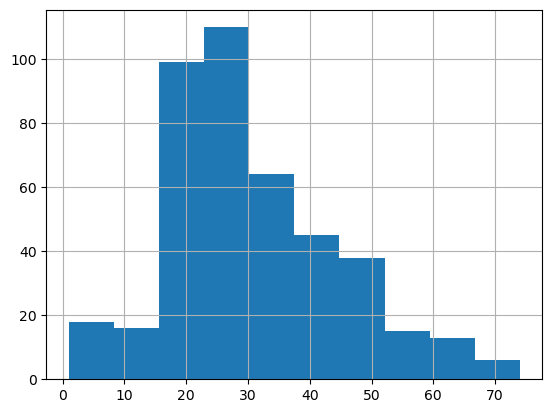

In [47]:
surv_no['Age'].hist(bins=10)

In [49]:
surv_no['Age'].describe()

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

In [54]:
surv_no['Age'].mode()

0    21.0
Name: Age, dtype: float64

In [59]:
surv_nm = surv_no['Age'] < 10
surv_nm.sum()

24

In [45]:
surv_yes = df[df['Survived'] == 1]
surv_yes.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


<Axes: >

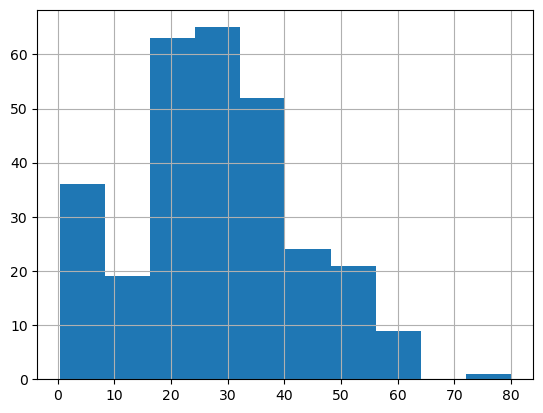

In [50]:
surv_yes['Age'].hist(bins=10)

In [51]:
surv_yes['Age'].describe()

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [53]:
surv_yes['Age'].mode()

0    24.0
Name: Age, dtype: float64

In [58]:
surv_ym = surv_yes['Age'] <10
surv_ym.sum()


38

Lo más notable que podemos rescatar en cuestión de la edad es el amplio cambio en las personas que sobrevivieron siendo menores de 10 años a comparación de las personas que no sobrevivieron. Otro de los insights que notamos es que, los pasajeros que sobrevivieron tienen un promedio de edad de un poco más de 2 años menor a la gente que falleció.

La persona más grande que sobrevivió tenía 80 años, mientras que, el pasajero que falleció con menor edad tenía tan solo un año.

## ¿Cómo se distribuyen los sexos (sobrevivientes/no sobrevivientes) de los pasajeros del titanic?

<Axes: >

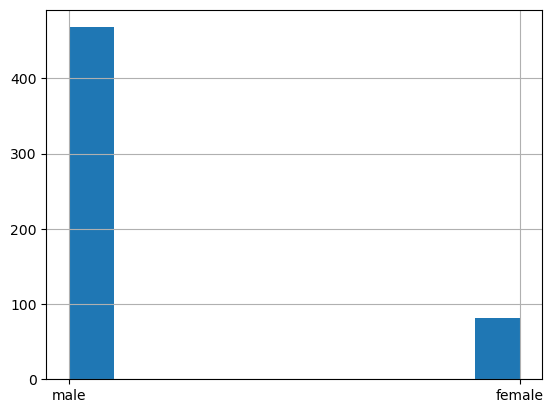

In [73]:
surv_no.Sex.hist()

In [86]:
male_nosurv = surv_no['Sex'] == 'male'
female_nosurv = surv_no['Sex'] == 'female'
print(f'De los pasajeros que fallecieron, {male_nosurv.sum()}  eran hombres y {female_nosurv.sum()} eran mujeres.')
print(f'El {(male_nosurv.sum()/len(surv_no))*100:.2f}% de las personas que no sobrevivieron eran hombres y el {female_nosurv.sum()/len(surv_no)*100:.2f}% eran mujeres.')

De los pasajeros que fallecieron, 468  eran hombres y 81 eran mujeres.
El 85.25% de las personas que no sobrevivieron eran hombres y el 14.75% eran mujeres.


Survived Yes

<Axes: >

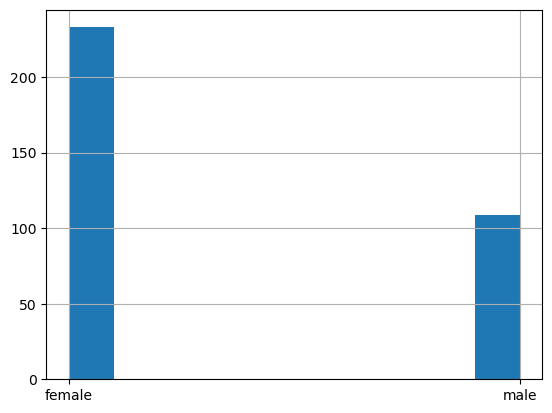

In [75]:
surv_yes['Sex'].hist()

In [88]:
male_ysurv = surv_yes['Sex'] == 'male'
female_ysurv = surv_yes['Sex'] == 'female'
print(f'De los pasajeros que sobrevivieron, {male_ysurv.sum()}  eran hombres y {female_ysurv.sum()} eran mujeres.')
print(f'El {(male_ysurv.sum()/len(surv_yes))*100:.2f}% de las personas que no sobrevivieron eran hombres y el {female_ysurv.sum()/len(surv_yes)*100:.2f}% eran mujeres.')

De los pasajeros que sobrevivieron, 109  eran hombres y 233 eran mujeres.
El 31.87% de las personas que no sobrevivieron eran hombres y el 68.13% eran mujeres.
